In [ ]:
from google.colab import drive
drive.mount('/gdrive')
# !pip3 install virtualenv
# !virtualenv theanoEnv

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
!python -m pip install git+https://github.com/pytube/pytube
! pip install pydub
# !pip install openai
!pip install paddlepaddle -i https://mirror.baidu.com/pypi/simple
!pip install paddleocr
import cv2
from google.colab import drive
from pytube import YouTube
drive.mount('/gdrive')
import os
import re
from PIL import Image
import numpy as np
from numpy import mean
from moviepy.editor import VideoFileClip
from paddleocr import PaddleOCR, draw_ocr
import csv
!pip install fastDamerauLevenshtein
from fastDamerauLevenshtein import damerauLevenshtein

  Cloning https://github.com/pytube/pytube to /tmp/pip-req-build-f3lmi4tj
  Running command git clone --filter=blob:none --quiet https://github.com/pytube/pytube /tmp/pip-req-build-f3lmi4tj
  Resolved https://github.com/pytube/pytube to commit a32fff39058a6f7e5e59ecd06a7467b71197ce35
  Preparing metadata (setup.py) ... done
Looking in indexes: https://mirror.baidu.com/pypi/simple
Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
  Preparing metadata (setup.py) ... done
  Created wheel for fastDamerauLevenshtein: filename=fastDamerauLevenshtein-1.0.7-cp310-cp310-linux_x86_64.whl size=53646 sha256=05a6e8ecf44c88127d578cf4b814911e1c8107d91f77349f27a9a1448ae4e676
  Stored in directory: /root/.cache/pip/wheels/de/48/fe/3d80d282115f627c1dcf5764dac377793d2b028087ac461220
Successfully built fastDamerauLevenshtein


In [ ]:
video_url = "https://www.youtube.com/watch?v=z4muoYw994A&ab_channel=S%C3%BCdtirol%7CAltoAdige%7CSouthTyrol"
yt = YouTube(video_url)
stream = yt.streams.filter(progressive=True, file_extension='mp4').order_by('resolution').desc().first()#.download()

In [ ]:
def rename(s):
    s = re.sub(r'\s', '', s)
    return re.sub(r'[-–]', '_', s )

os.chdir('/gdrive/MyDrive/Whisper/luca/southtyrolinfo_videos/')
# stream.download(filename=rename(stream.default_filename))

In [ ]:
fname = 'HofdesWandels_AndersalsgewohntSüdtirol.mp4'
count = 0
vidcap = cv2.VideoCapture(fname)
vidcap.set(cv2.CAP_PROP_POS_MSEC,(count*500))    # added this line
success,image = vidcap.read()

In [ ]:
image

In [ ]:
fname = 'HofdesWandels_AndersalsgewohntSüdtirol.mp4'
vidcap = cv2.VideoCapture(fname)
succes = True
count = 0
while success:
    try:
        vidcap.set(cv2.CAP_PROP_POS_MSEC,(count*2000))    # added this line
        success,image = vidcap.read()
        cv2.imwrite(f"{fname[:10]}_frame_{count}.jpg", image)     # save frame as JPEG file
        count += 1
    except Exception as e:
        print(e)

In [ ]:


# Specify the path to your MP4 video file
video_path = 'HofdesWandels_AndersalsgewohntSüdtirol.mp4'

# Specify the path where you want to save the extracted audio file
audio_path = 'HofdesWandels_AndersalsgewohntSüdtirol.mp3'

# Load the video file
video_clip = VideoFileClip(video_path)

# Extract the audio from the video clip
audio_clip = video_clip.audio

# Write the audio clip to the specified file (in this case, MP3)
audio_clip.write_audiofile(audio_path)

# Close the clips to release their resources
video_clip.close()
audio_clip.close()


MoviePy - Writing audio in HofdesWandels_AndersalsgewohntSüdtirol.mp3


MoviePy - Done.


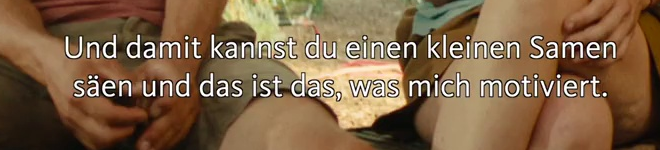

In [ ]:
im = Image.open("HofdesWand_frame_120.jpg")
# cropped_image = image.crop(100, 100, 300, 300)
im.crop((300, 550, 960, 700))

In [ ]:
im.crop((300, 550, 960, 700)).save('HofdesWand_frame_120_crop.jpg')

array([[[140,  96,  57],
        [138,  94,  55],
        [137,  93,  54],
        ...,
        [ 79,  34,   5],
        [ 75,  31,   4],
        [ 69,  28,   6]],

       [[138,  94,  55],
        [138,  94,  55],
        [138,  94,  55],
        ...,
        [ 70,  30,   4],
        [ 68,  30,   7],
        [ 63,  28,   8]],

       [[138,  94,  55],
        [138,  94,  55],
        [137,  93,  54],
        ...,
        [ 64,  30,   5],
        [ 62,  31,  10],
        [ 57,  32,  10]],

       ...,

       [[ 26,  17,  12],
        [ 26,  17,  12],
        [ 26,  17,  12],
        ...,
        [ 32,  19,   3],
        [ 32,  19,  10],
        [ 30,  20,  11]],

       [[ 27,  20,  14],
        [ 27,  20,  14],
        [ 26,  19,  13],
        ...,
        [ 31,  14,   4],
        [ 28,  17,  11],
        [ 28,  19,  14]],

       [[ 28,  21,  15],
        [ 28,  21,  15],
        [ 27,  20,  14],
        ...,
        [ 27,  10,   2],
        [ 25,  14,  10],
        [ 26,  16,  14]]], dtype=uint8)
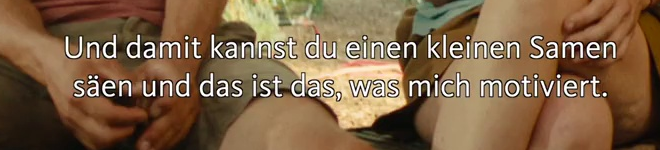

In [ ]:
cropped = im.crop((300, 550, 960, 700))
cropped.tobytes()
np.array(cropped.convert("RGB"))

In [ ]:

# Create an OCR model. This automatically downloads the default English model the first time
ocr_model = PaddleOCR(use_angle_cls=True, lang='de')

# Replace 'path_to_your_image.jpg' with the path to the image you want to process

framenames = [i for i in os.listdir() if i.endswith('jpg')]

with open('HofdesWand.csv' , 'w') as dataout:
    dataout.write('fname' + '\t' +'mean_ocr_score' + '\t' +  'text' + '\n')
    for image_path in framenames:
        try:
            im = Image.open(image_path)
            cropped = im.crop((300, 550, 960, 700))
            # Run OCR on the image
            result = ocr_model.ocr( np.array(cropped.convert("RGB")))

            # Extracting detected texts and their positions
            # for line in result:
            #     print(line)

            # If you want to visualize the results:
            image = Image.open(image_path).convert('RGB')
            boxes = [line[0] for line in result[0]]  # Extracting bounding boxes
            texts = [line[1][0] for line in result[0]]  # Extracting detected texts
            scores = [line[1][1] for line in result[0]]  # Extracting confidence scores
            dataout.write(image_path + '\t' + str(mean(scores)) + '\t' +  ' '.join(texts) + '\n')
        except:
            dataout.write(image_path + '\t' + '0' + '\t' +  'no_ocr' + '\n')


[2024/04/10 14:33:45] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/latin/latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_

In [ ]:
from collections import defaultdict
transcr = [i for i in csv.reader(open('HofdesWand.csv'), delimiter='\t') if i[2] != 'no_ocr'][1:]
fr_per_trans = defaultdict(list)
current_frame = transcr[0][0]
for a,b in zip(transcr, transcr[1:]):
    if damerauLevenshtein(a[2],b[2] ) > 0.9:
        fr_per_trans[current_frame].append(a[2])
    else:
        current_frame = b[0]

In [ ]:
fr_per_trans

defaultdict(list,
            {'HofdesWand_frame_9.jpg': ['Dass wir es anders machen wollen,als wir es bisher gemacht haben. Etwas, das nicht mehr'],
             'HofdesWand_frame_11.jpg': ['konventionell ist,das der Umwelt nicht meh schadet,das keine Pestizide beinhaltet,',
              'konventionell ist,das der Umwelt nicht meh schadet,das keine Pestizide beinhaltet,'],
             'HofdesWand_frame_20.jpg': ['In dem Sinne hat es für mich eine große Wichtigkeit,'],
             'HofdesWand_frame_22.jpg': ['dass wir für das unmittelbare Umfeld hochwertige Nahrungsmittel produzieren'],
             'HofdesWand_frame_24.jpg': ['oder auch Heilmittel oder Blumen die wir mittlerweile anbauen',
              'oder auch Heilmittel oder Blumen, die wir mittlerweile anbauen'],
             'HofdesWand_frame_28.jpg': ['und bei uns ist es so aufgeteilt, dass lakob die Produktion macht'],
             'HofdesWand_frame_30.jpg': ['GröBtenteils.Auch wenn sich unsere Arbeitsfelde häufig überschn

In [ ]:

im = Image.open("HofdesWand_frame_120.jpg")
# cropped_image = image.crop(100, 100, 300, 300)
im.crop((300, 550, 960, 700))

0.9468298256397247

In [ ]:
texts

['Und damit kannst du einen kleinen Samen',
 'säen und das ist das,was mich motiviert']

In [ ]:
import re

def extractImages(pathIn, pathOut):
    count = 0
    vidcap = cv2.VideoCapture(pathIn)
    success,image = vidcap.read()
    success = True
    while success:
        vidcap.set(cv2.CAP_PROP_POS_MSEC,(count*1000))    # added this line
        success,image = vidcap.read()
        print ('Read a new frame: ', success)
        cv2.imwrite( pathOut + f"frame_{}.jpg", image)     # save frame as JPEG file
        count = count + 1

In [ ]:
from pydub import AudioSegment

# Load the MP3 file
audio_path = 'HofdesWandels_AndersalsgewohntSüdtirol.mp3'
audio = AudioSegment.from_mp3(audio_path)

# Define the length of each chunk in milliseconds
chunk_length_ms = 30 * 1000  # 30 seconds in milliseconds

# Calculate the number of chunks
num_chunks = len(audio) // chunk_length_ms + (1 if len(audio) % chunk_length_ms > 0 else 0)

# Split the audio and save each chunk
for i in range(num_chunks):
    # Calculate the start and end times for the current chunk
    start_ms = i * chunk_length_ms
    end_ms = start_ms + chunk_length_ms

    # Extract the chunk
    chunk = audio[start_ms:end_ms]

    # Save the chunk to a new file
    chunk_name = f'HofdesWand_chunk_{i+1}.mp3'
    chunk.export(chunk_name, format="mp3")

    print(f"Chunk {i+1} has been saved as {chunk_name}")


Chunk 1 has been saved as HofdesWand_chunk_1.mp3
Chunk 2 has been saved as HofdesWand_chunk_2.mp3
Chunk 3 has been saved as HofdesWand_chunk_3.mp3
Chunk 4 has been saved as HofdesWand_chunk_4.mp3
Chunk 5 has been saved as HofdesWand_chunk_5.mp3
Chunk 6 has been saved as HofdesWand_chunk_6.mp3
Chunk 7 has been saved as HofdesWand_chunk_7.mp3
Chunk 8 has been saved as HofdesWand_chunk_8.mp3
Chunk 9 has been saved as HofdesWand_chunk_9.mp3
Chunk 10 has been saved as HofdesWand_chunk_10.mp3




---

###**Should we need it:**





In [ ]:
class YouTubeScraper:
  def __init__(self):
    return None

  @staticmethod
  def rename(filename):
    s = re.sub(r'\s', '', filename)
    return re.sub(r'[-–]', '_', s)

  def fromyoutubetoaudio(self, url, download = False):
    yt = YouTube(url) #creates a YouTube object for the given video
    stream = yt.streams.filter(progressive = True, file_extension = 'mp4').order_by('resolution').desc().first() #creates a Stream object from the YouTube object

    # Downloads the video, if selected True
    if download == True:
      #stream.download() #for original filename
      stream.download(filename = self.rename(stream.default_filename)) #downloads the video file with the new filename
    else:
      pass

    # Download frames from the video
    fname = self.rename(stream.default_filename) #renames the stream and sets to new variable
    vidcap = cv2.VideoCapture(fname) #creates a VideoCapture object
    count = 0 #sets iterative count to 0
    success = True #starts the success loop with True
    while success:
      try:
        vidcap.set(cv2.CAP_PROP_POS_MSEC,(count*2000))
        success, image = vidcap.read() #scrape the frame and whether extraction was successful
        cv2.imwrite(f"{fname[:10]}_frame_{count}.jpg", image) #write the frame to jpg
        count += 1 #advance the count by 1
      except Exception as e:
        print(e)

    video_path = fname
    video_clip
    audio_path = fname[:-4] + '.mp3'


    return video_path, audio_path